In [1]:
from tock import *

# Pushdown automata

Pushdown automata (PDA) are NFAs equipped with a stack (or _pushdown store_). At every step, they are allowed to pop a symbol from the stack and/or push a symbol onto the stack. By default, they are nondeterministic. The PDA in Example 2.14 is:

In [2]:
m = read_csv("examples/pda.csv")
m.is_finite(), m.is_pushdown(), m.is_deterministic()

(False, True, True)

In [3]:
display_table(m)

,"ε,ε","ε,$","0,ε","1,0"
>q1,"q2,$",,,
q2,,,"q2,0","q3,ε"
q3,,"q4,ε",,"q3,ε"


The first column lists the states, just as in a FA. The first row lists pairs of input symbols and popped stack symbols. Note that this is a little different from Sipser, who uses two header rows, one for stack symbols and one for input symbols.

The cells contain pairs of new states and pushed stack symbols. So, if the machine is in state `q2`, and the next input symbol is `0`, then the machine stays in state `q2` and pushes a `0` onto the stack.

Here's the state transition diagram:

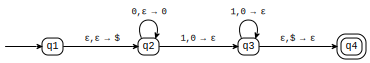

In [4]:
display_graph(m)

Now it's easier to see that it accepts strings of the form $\texttt{0}^n\texttt{1}^n$. If you draw the graph in a graph editor, use `->` for a right arrow.

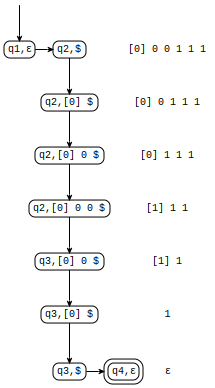

In [5]:
m.run("0 0 0 1 1 1")

The nodes of the run now show the contents of the stack as well. The top symbol of the stack is marked with square brackets.

This is a deterministic PDA. That's not very exciting, so let's try a nondeterministic PDA. This one accepts strings of the form $\{vw \mid |v|=|w|, v \neq w\}$.

In [6]:
m = read_csv("examples/notww.csv")
m.is_finite(), m.is_pushdown(), m.is_deterministic()

(False, True, False)

In [7]:
display_table(m)

,"ε,ε","ε,$","a,ε","a,#","b,ε","b,#"
>q0,"q1,$",,,,,
q1,,,"{(q1,#),(q2a,ε)}",,"{(q1,#),(q2b,ε)}",
q2a,,"q3a,$",,"q2a,ε",,"q2a,ε"
q2b,,"q3b,$",,"q2b,ε",,"q2b,ε"
q3a,,,"q3a,#",,"{(q3a,#),(q4,ε)}",
q3b,,,"{(q3b,#),(q4,ε)}",,"q3b,#",
q4,,"qf,ε",,"q4,ε",,"q4,ε"


Notice that if a cell has multiple tuples, then each tuple must be enclosed in parentheses.

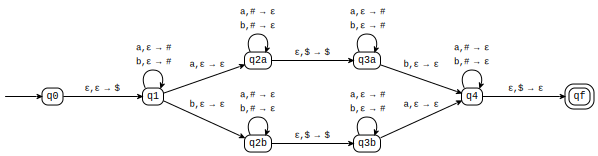

In [8]:
display_graph(m)

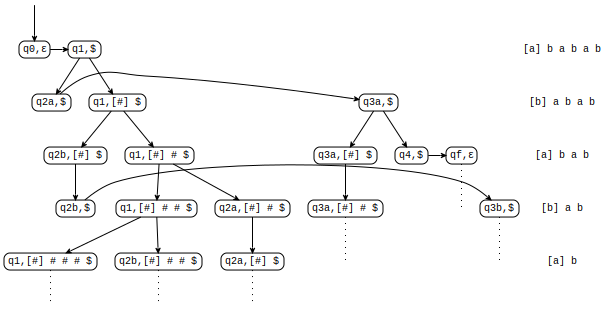

In [9]:
m.run("a b a b a b", steps=5)

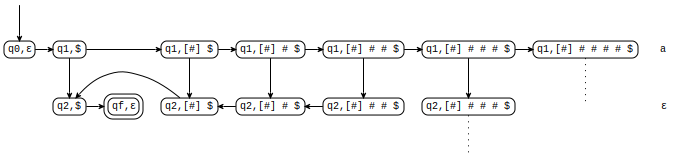

In [10]:
import tock.pda
m = tock.machines.Machine(3, input=1)
m.set_start_config("q0, &")
m.add_accept_config("qf, &, &")
m.add_transition("q0, &, & -> q1, $")
m.add_transition("q1, &, & -> q1, #")
m.add_transition("q1, a, & -> q2, &")
m.add_transition("q2, &, # -> q2, &")
m.add_transition("q2, &, $ -> qf, &")
m.run("a", steps=6)

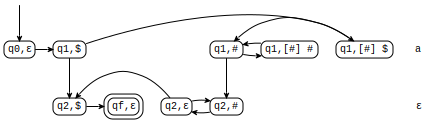

In [11]:
tock.pda.run_pda(m, "a")